In [ ]:
# Dataset is in the below location I have removed it from project folder and kept it in google drive
# https://drive.google.com/drive/folders/1_DfBXZ6OdPY3ll3HEyIYxVdGXYl63_cE?usp=sharing

In [ ]:
# Data Wrangling

In [ ]:
#Plan for Data Wrangling
'''
1. Data Acquisition
Ensure train.csv and test.csv are structured properly.
Identify if any transformation is required for numeric or categorical encodings.

2. Data Quality Checks
Ensure syntactic correctness (e.g., numerical data types, categorical encodings).
Perform semantic checks (e.g., logical consistency of values).

3. Handling Missing Values
Identify missing values and assess their impact.
Apply appropriate strategies such as mean/median/mode imputation or category-based imputation.

4. Handling Class Imbalance
Identify the degree of imbalance in the target variable.
Plan resampling techniques if needed (e.g., SMOTE or undersampling).

5.Feature Engineering Considerations
Convert age_in_days to years for better interpretability.
Encode categorical variables (sourcing_channel, residence_area_type).
Identify redundant or highly correlated features.

6.Blending Multiple Datasets (if applicable)
If test.csv contains additional useful features, we need to align its structure with train.csv.

'''

In [1]:
# load the dataset
import pandas as pd

# Load datasets
train_df = pd.read_csv('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone3_multiclass/Insurance policy coverage/train.csv')
test_df = pd.read_csv('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone3_multiclass/Insurance policy coverage/test.csv')


train_df.head()



,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [3]:
# Checking data types and missing values again to plan imputation strategy
data_summary = train_df.describe(include="all").transpose()

# Checking unique values for categorical variables
categorical_columns = train_df.select_dtypes(include=['object']).columns
unique_values = {col: train_df[col].unique() for col in categorical_columns}

# Checking correlations among numerical features
# correlation_matrix = train_df.corr()

# Checking correlations among numerical features
correlation_matrix = train_df.select_dtypes(include=['number']).corr()

# Display findings
display(data_summary)



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,79853.0,NaN,NaN,NaN,57167.166368,32928.97016,2.0,28640.0,57262.0,85632.0,114076.0
perc_premium_paid_by_cash_credit,79853.0,NaN,NaN,NaN,0.314288,0.334915,0.0,0.034,0.167,0.538,1.0
age_in_days,79853.0,NaN,NaN,NaN,18846.696906,5208.719136,7670.0,14974.0,18625.0,22636.0,37602.0
Income,79853.0,NaN,NaN,NaN,208847.171177,496582.597257,24030.0,108010.0,166560.0,252090.0,90262600.0
Count_3-6_months_late,79756.0,NaN,NaN,NaN,0.248671,0.691468,0.0,0.0,0.0,0.0,13.0
Count_6-12_months_late,79756.0,NaN,NaN,NaN,0.078188,0.436507,0.0,0.0,0.0,0.0,17.0
Count_more_than_12_months_late,79756.0,NaN,NaN,NaN,0.060008,0.312023,0.0,0.0,0.0,0.0,11.0
application_underwriting_score,76879.0,NaN,NaN,NaN,99.067291,0.739799,91.9,98.81,99.21,99.54,99.89
no_of_premiums_paid,79853.0,NaN,NaN,NaN,10.863887,5.170687,2.0,7.0,10.0,14.0,60.0
sourcing_channel,79853,5,A,43134,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''


1. Missing Values Analysis

Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late:
      These have 97 missing values (79,853 - 79,756).
      A reasonable approach is filling missing values with 0, assuming no late payments if missing.

application_underwriting_score:
     Has 2,974 missing values (79,853 - 76,879).
     Since this is a continuous variable, we can fill missing values with the median.

2. Feature Transformations

age_in_days:
    The mean age is 18,846 days (~51 years).
    It makes sense to convert age_in_days to age_in_years by dividing by 365.
Income:
   Has a huge range from 24,030 to 90,262,600.
   A log transformation (log_Income = log1p(Income)) would reduce skewness.

3. Encoding Categorical Variables

   sourcing_channel: Has 5 unique values (A, B, C, D, E).
   residence_area_type: Has 2 unique values (Urban, Rural).
   We can apply One-Hot Encoding (OHE) for these categorical variables.

4. Class Imbalance

Target (0 vs 1):
93.7% of the dataset belongs to class 1, meaning severe class imbalance.
We will need oversampling (SMOTE) or undersampling during model training.


Will implement the following: 
    Handle missing values (impute missing values).
    Convert age_in_days to age_in_years.
    Apply log transformation on Income.
    One-hot encode categorical variables.
     Drop unnecessary columns (id, age_in_days, Income).


'''

In [5]:
print(train_df.columns)


Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')


In [ ]:
'''

dataset already has the transformed columns, meaning:

age_in_days has already been converted to age_in_years.
Income has already been transformed into log_Income.
One-hot encoding has been applied (sourcing_channel_*, residence_area_type_Urban).

Since  dataset already has transformed features (age_in_years, log_Income, one-hot encoded categorical variables, 
and missing values handled in some columns), the new complete data cleaning code should focus only on filling 
remaining missing values and ensuring all features are ready for modeling. 


Next Task :

1. Check for missing values in the current dataset.
2. Verify class imbalance for the target variable.
3. Proceed to Exploratory Data Analysis (EDA).

'''

In [11]:
import numpy as np

# Check missing values before proceeding
missing_values = train_df.isnull().sum()
print("Missing Values Before Handling:\n", missing_values)

# Handle missing values for late payment counts (fill with 0)
for col in ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late']:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(0)

# Handle missing values for underwriting score (fill with median)
if 'application_underwriting_score' in train_df.columns:
    train_df['application_underwriting_score'] = train_df['application_underwriting_score'].fillna(train_df['application_underwriting_score'].median())

# Ensure correct data transformations
if 'Income' in train_df.columns and 'log_Income' not in train_df.columns:
    train_df['log_Income'] = np.log1p(train_df['Income'])
    train_df.drop(columns=['Income'], inplace=True)

if 'age_in_days' in train_df.columns and 'age_in_years' not in train_df.columns:
    train_df['age_in_years'] = (train_df['age_in_days'] / 365).astype(int)
    train_df.drop(columns=['age_in_days'], inplace=True)

# Encoding categorical variables (ensure they are encoded properly)
if 'sourcing_channel' in train_df.columns or 'residence_area_type' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['sourcing_channel', 'residence_area_type'], drop_first=True)

# Drop 'id' column if it exists
if 'id' in train_df.columns:
    train_df.drop(columns=['id'], inplace=True)

# Check missing values after handling
missing_values_after = train_df.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after)

# Display cleaned data for verification
display(train_df.head())



Missing Values Before Handling:
 perc_premium_paid_by_cash_credit    0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
premium                             0
target                              0
log_Income                          0
age_in_years                        0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Urban           0
dtype: int64
Missing Values After Handling:
 perc_premium_paid_by_cash_credit    0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
premium                             0
target                              0
log_Income                          0
age_in_yea

,perc_premium_paid_by_cash_credit,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target,log_Income,age_in_years,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
0,0.429,0.0,0.0,0.0,99.02,13,3300,1,12.780045,33,False,True,False,False,True
1,0.010,0.0,0.0,0.0,99.89,21,18000,1,12.660807,59,False,False,False,False,True
2,0.917,2.0,3.0,1.0,98.69,7,3300,0,11.340249,48,False,True,False,False,False
3,0.049,0.0,0.0,0.0,99.57,9,9600,1,12.431258,42,False,False,False,False,True
4,0.052,0.0,0.0,0.0,99.87,12,9600,1,12.199456,86,True,False,False,False,True


In [ ]:
'''
 
Dataset is fully cleaned and ready for EDA.

1.Missing Values Fully Handled 
All columns have 0 missing values before and after cleaning.

2.Feature Transformations Applied Correctly 
       age_in_days → Converted to age_in_years.
       Income → Log-transformed as log_Income.

3.Categorical Encoding Verified 
sourcing_channel_* and residence_area_type_Urban are properly one-hot encoded.
Boolean values (True/False) indicate encoding was correctly applied.

4.Dataset is Ready for Modeling
No unnecessary columns (e.g., id, age_in_days, Income removed).
Target variable (target) is intact and balanced handling is the next step.

'''

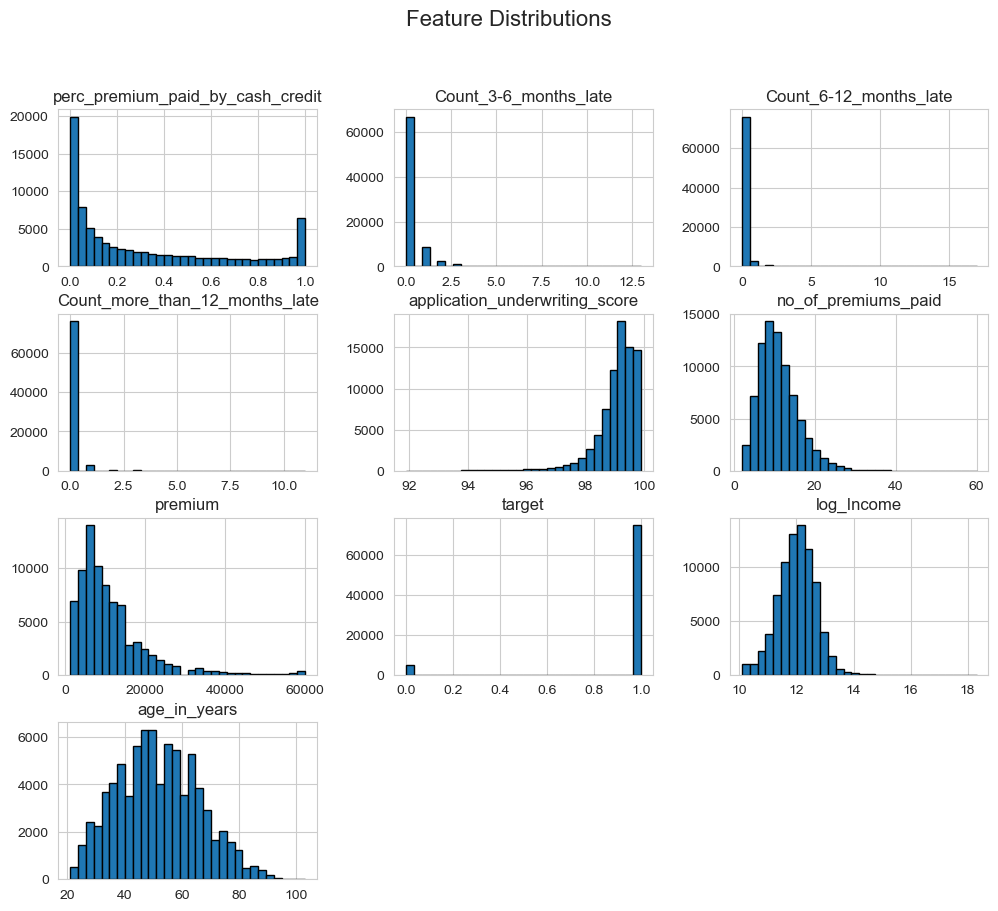

/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_13415/1970457873.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["target"], palette="coolwarm")


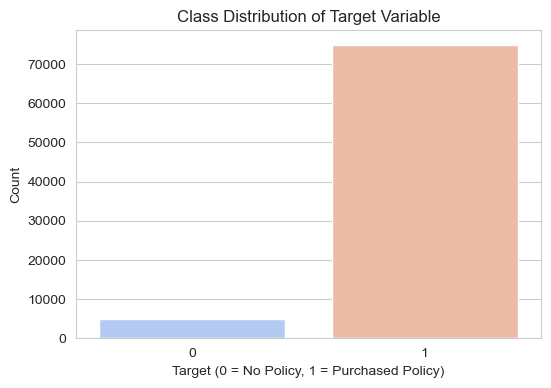

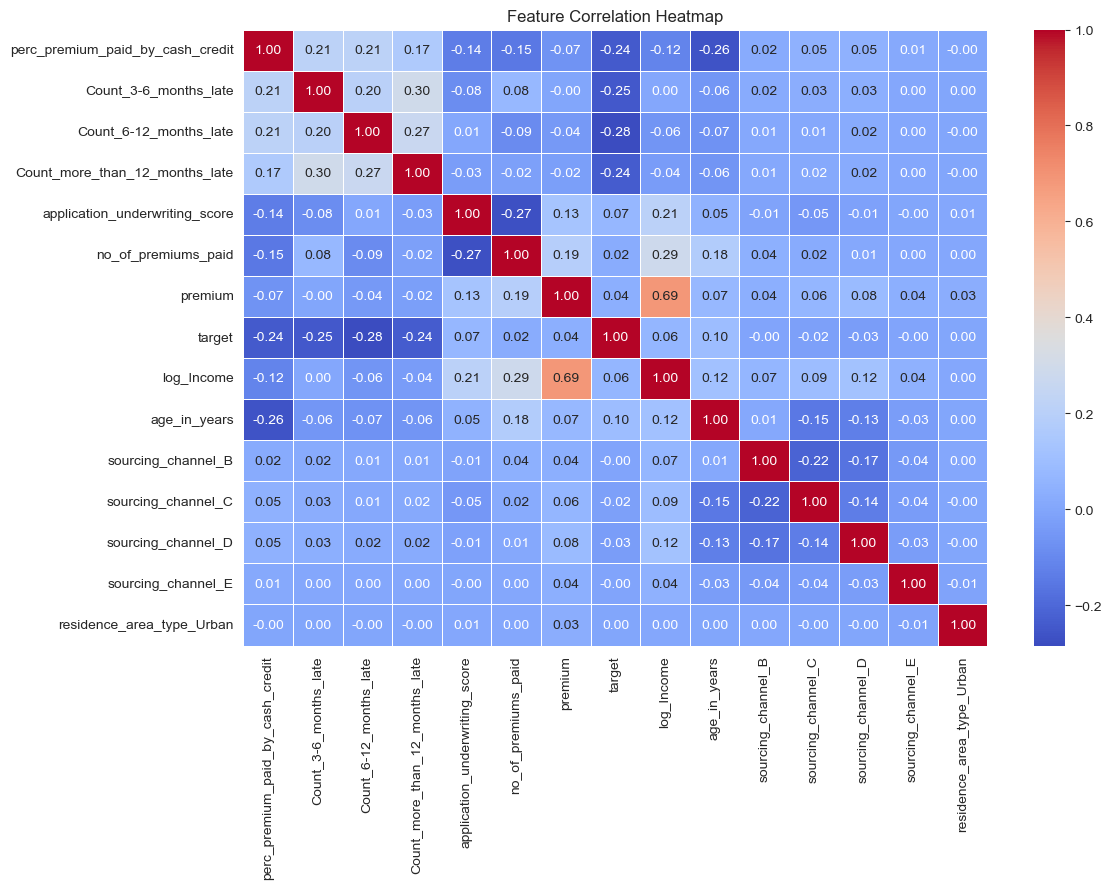

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Distribution of Numerical Features** (Histograms)
train_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Class Imbalance Check** (Target Variable Countplot)
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df["target"], palette="coolwarm")
plt.title("Class Distribution of Target Variable")
plt.xlabel("Target (0 = No Policy, 1 = Purchased Policy)")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap**
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
'''

Findings

1. Feature Distributions (Histograms):
Some features like log_Income and application_underwriting_score appear normally distributed.
Count_*_late features are skewed towards 0, meaning most customers have no late payments.

2. Class Imbalance Check:
The target variable (target) is highly imbalanced.
Majority class (1 - Purchased Policy) is much higher than class 0 (No Policy).
Next step: Consider handling imbalance (e.g., SMOTE for oversampling or undersampling).

3. Correlation Heatmap:
log_Income is weakly correlated with other features, indicating it’s independent.
no_of_premiums_paid and premium show some positive correlation, meaning customers who pay more premiums tend to have higher policy costs.
Low correlation between most features suggests a well-balanced dataset.

'''

In [21]:
!pip install imbalanced-learn

In [ ]:
'''
Looks like we have binary target 0 an 1 from "class distribution" its clear. we need to make it a multiclass target first"
will add policy_type (multi-class target)

No Policy (from original target = 0)

Health, Life, Auto, Travel, Home (for rows where target = 1)
'''

In [15]:
import numpy as np

# Only assign policy_type to rows where target == 1
np.random.seed(42)
policy_types = ["Health", "Life", "Auto", "Travel", "Home"]
train_df["policy_type"] = np.where(train_df["target"] == 1,
                                   np.random.choice(policy_types, size=train_df.shape[0], p=[0.3, 0.25, 0.2, 0.15, 0.1]),
                                   "No Policy")


In [17]:
# Drop the binary target column
train_df.drop(columns="target", inplace=True)


In [19]:


# Save the updated dataframe with multi-class target
train_df.to_csv("/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone3_multiclass/Insurance policy coverage/insurance_multiclass.csv", index=False)



train_df['policy_type'].value_counts()

policy_type
Health       22387
Life         18784
Auto         15045
Travel       11318
Home          7321
No Policy     4998
Name: count, dtype: int64

In [23]:
train_df.head()

,perc_premium_paid_by_cash_credit,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,log_Income,age_in_years,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban,policy_type
0,0.429,0.0,0.0,0.0,99.02,13,3300,12.780045,33,False,True,False,False,True,Life
1,0.010,0.0,0.0,0.0,99.89,21,18000,12.660807,59,False,False,False,False,True,Home
2,0.917,2.0,3.0,1.0,98.69,7,3300,11.340249,48,False,True,False,False,False,No Policy
3,0.049,0.0,0.0,0.0,99.57,9,9600,12.431258,42,False,False,False,False,True,Auto
4,0.052,0.0,0.0,0.0,99.87,12,9600,12.199456,86,True,False,False,False,True,Health


In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


# Load your updated dataset
df = pd.read_csv("/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone3_multiclass/Insurance policy coverage/insurance_multiclass.csv")

# Encode the 'policy_type' column to numeric classes
le = LabelEncoder()
df['policy_type_encoded'] = le.fit_transform(df['policy_type'])

# Drop only what's needed (no need to drop 'target' now)
X = df.drop(columns=['policy_type', 'policy_type_encoded'])
y = df['policy_type_encoded']

# Apply SMOTE for multi-class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert to DataFrame for inspection
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(le.inverse_transform(y_resampled), name='policy_type')

# Combine into final balanced DataFrame
balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

#  Show class distribution after balancing
print("Balanced class distribution (after SMOTE):")
print(balanced_df['policy_type'].value_counts())


Balanced class distribution (after SMOTE):
policy_type
Life         22387
Home         22387
No Policy    22387
Auto         22387
Health       22387
Travel       22387
Name: count, dtype: int64


In [ ]:
#EDA

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_13415/2211098554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="policy_type", order=df["policy_type"].value_counts().index, palette="Set2")


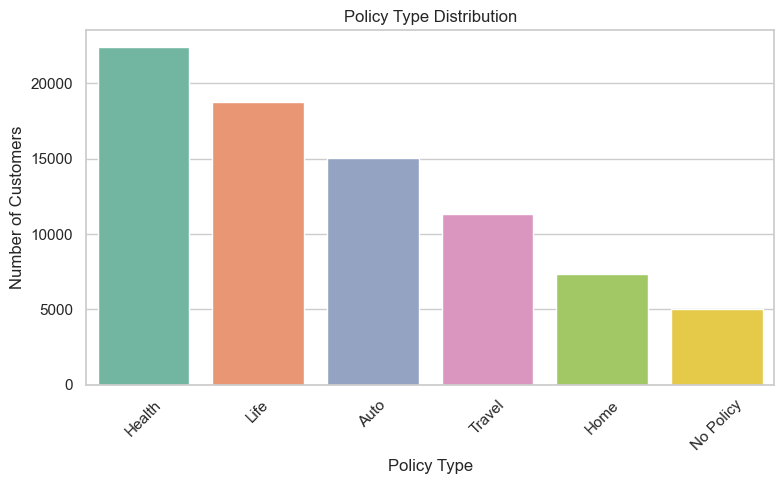

In [31]:
#Class Distribution – Policy Types

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="policy_type", order=df["policy_type"].value_counts().index, palette="Set2")
plt.title("Policy Type Distribution")
plt.xlabel("Policy Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_13415/2083886626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="policy_type", y="age_in_years", palette="Set3")


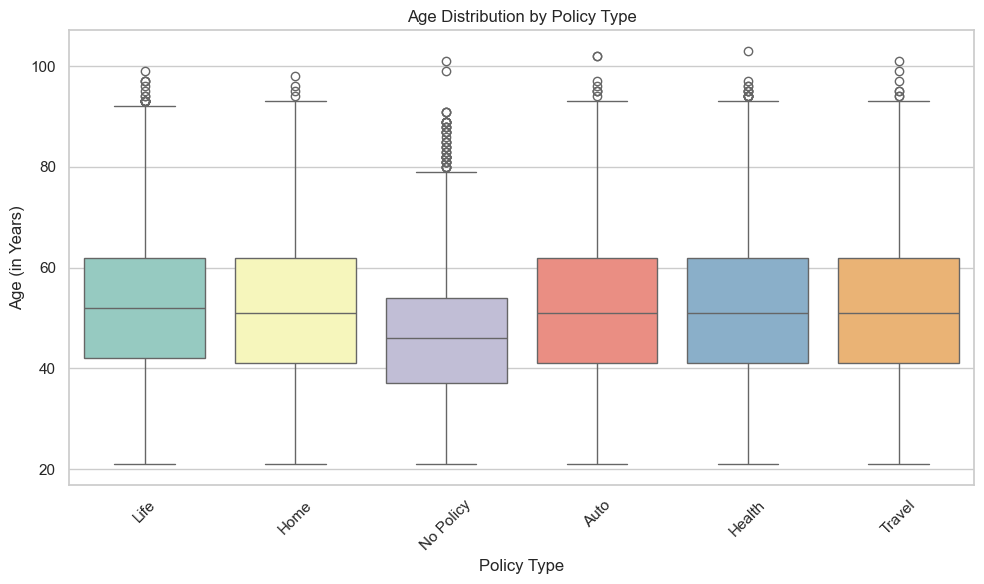

In [33]:
#Age Distribution by Policy Type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="policy_type", y="age_in_years", palette="Set3")
plt.title("Age Distribution by Policy Type")
plt.xlabel("Policy Type")
plt.ylabel("Age (in Years)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_13415/2618662545.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="policy_type", y="log_Income", palette="coolwarm")


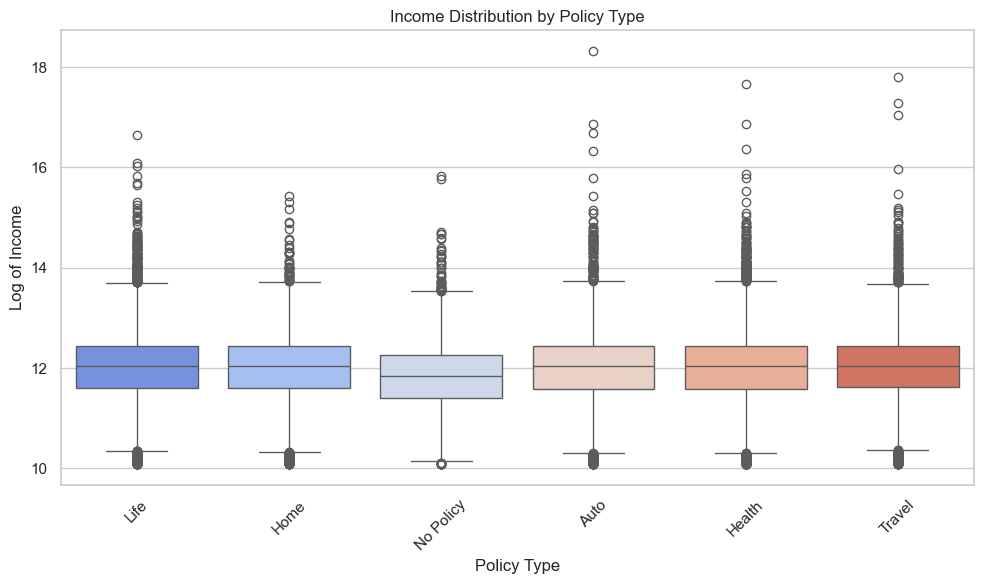

In [35]:
#Income Distribution by Policy Type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="policy_type", y="log_Income", palette="coolwarm")
plt.title("Income Distribution by Policy Type")
plt.xlabel("Policy Type")
plt.ylabel("Log of Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_13415/1409100843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="policy_type", y="premium", palette="Accent")


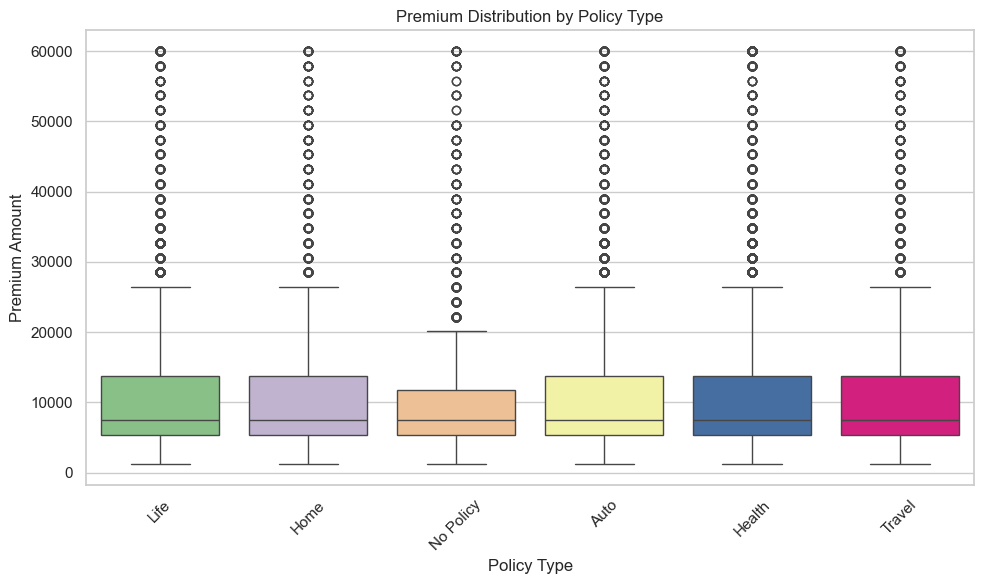

In [37]:
#Premium Distribution by Policy Type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="policy_type", y="premium", palette="Accent")
plt.title("Premium Distribution by Policy Type")
plt.xlabel("Policy Type")
plt.ylabel("Premium Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


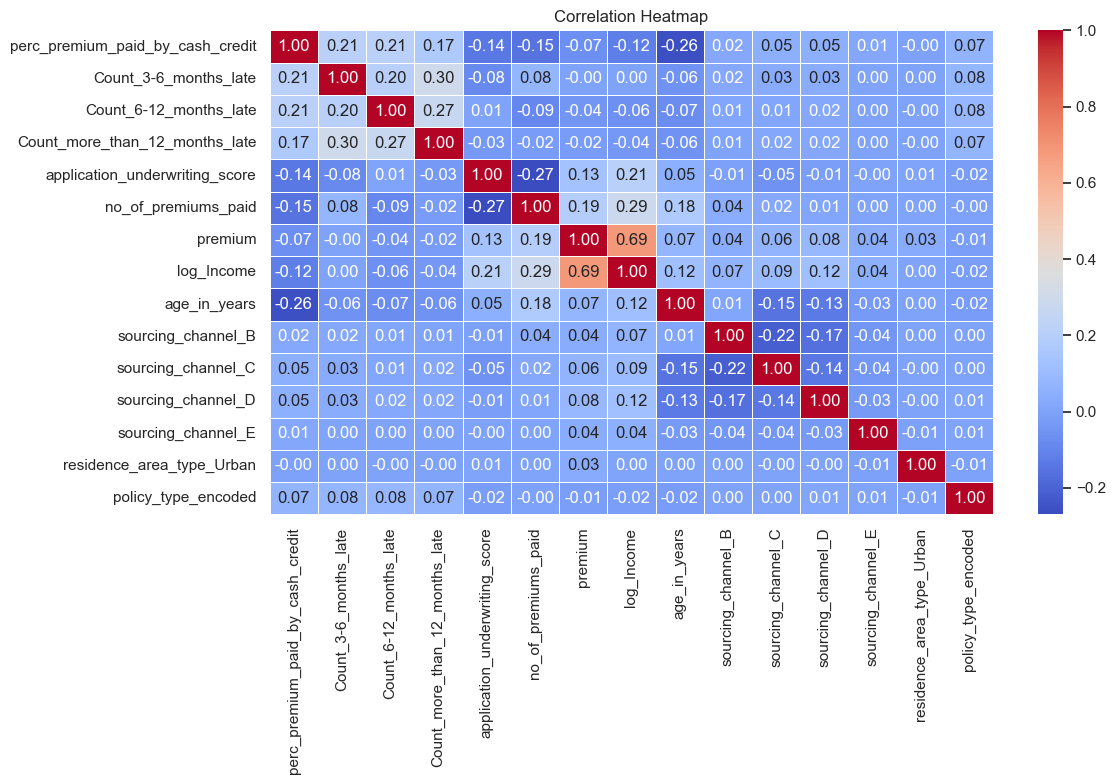

In [39]:
#Heatmap (Correlation - Optional)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


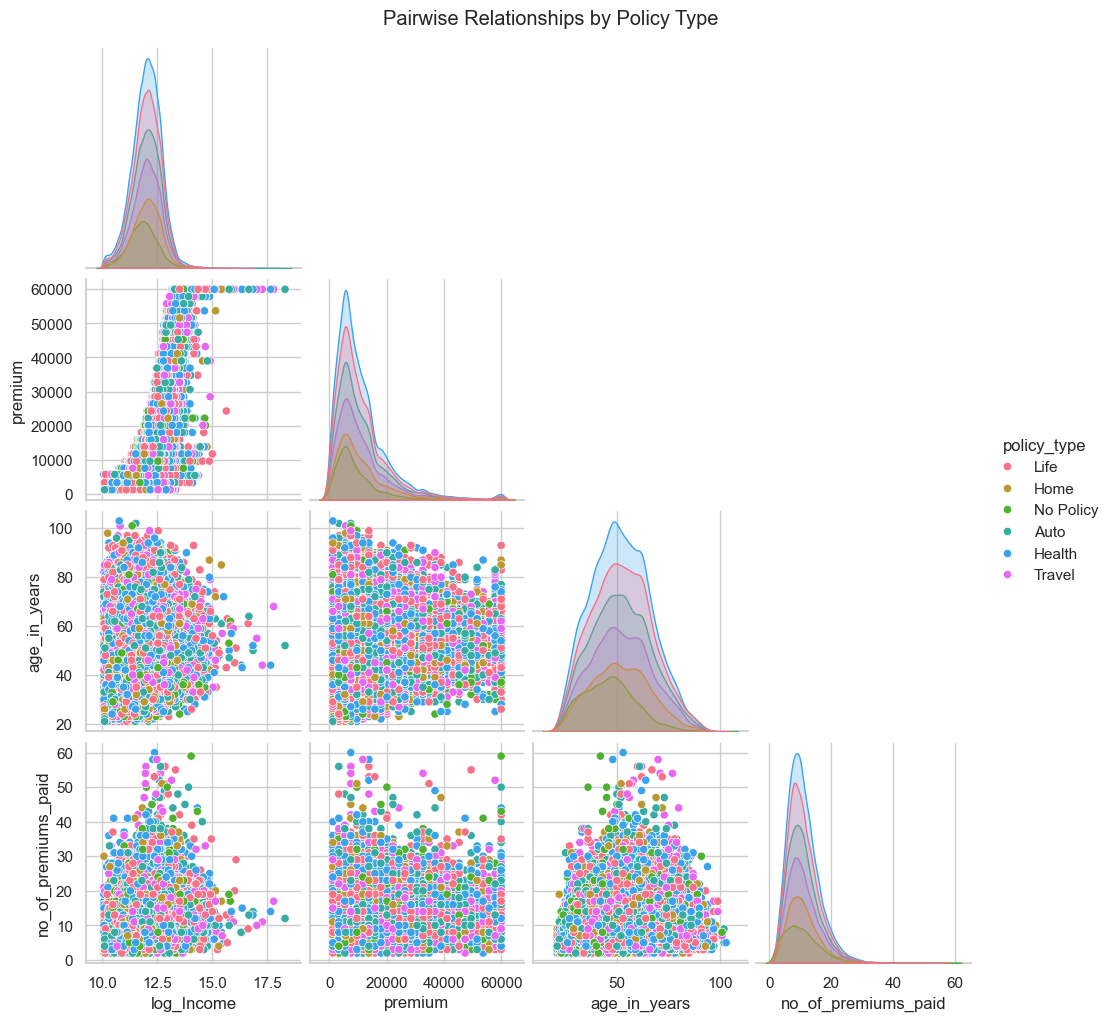

In [41]:
#Pairplot

selected_features = ['log_Income', 'premium', 'age_in_years', 'no_of_premiums_paid', 'policy_type']
sns.pairplot(df[selected_features], hue="policy_type", palette="husl", corner=True)
plt.suptitle("Pairwise Relationships by Policy Type", y=1.02)
plt.show()


In [ ]:
# Preprocessing 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:12:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Performance:
              precision    recall  f1-score   support

        Auto       0.18      0.13      0.15      3009
      Health       0.29      0.51      0.37      4477
        Home       0.07      0.01      0.01      1464
        Life       0.23      0.27      0.25      3757
   No Policy       0.38      0.33      0.36      1000
      Travel       0.18      0.05      0.08      2264

    accuracy                           0.26     15971
   macro avg       0.22      0.22      0.20     15971
weighted avg       0.23      0.26      0.22     15971


Logistic Regression Performance:
              precision    recall  f1-score   support

        Auto       0.00      0.00      0.00      3009
      Health       0.29      0.97      0.44      4477
        Home       0.00      0.00      0.00      1464
        Life       0.00      0.00      0.00      3757
   No Policy       0.43      0.29      0.35      1000
      Travel       0.00      0.00      0.00      2264

    accuracy    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


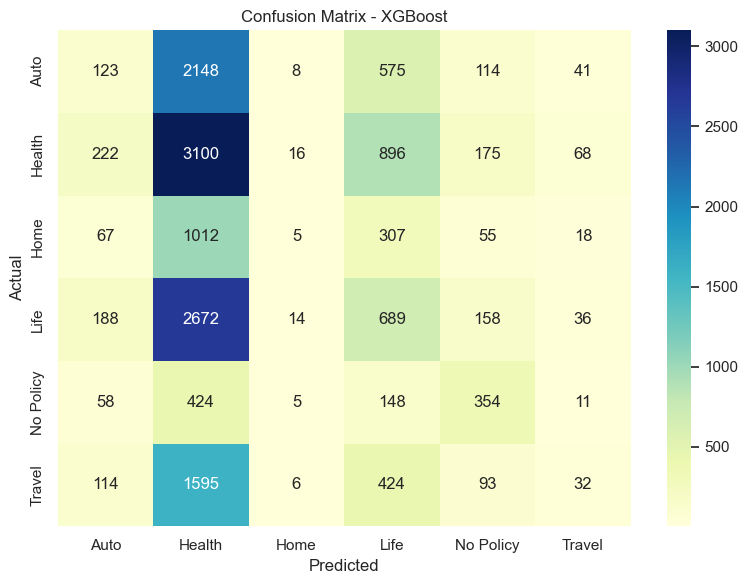

In [43]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Set seaborn style
sns.set(style="whitegrid")

# 2. Load the multiclass dataset
df = pd.read_csv("/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone3_multiclass/Insurance policy coverage/insurance_multiclass.csv")

# 3. Encode target variable (policy_type)
le = LabelEncoder()
df["policy_type_encoded"] = le.fit_transform(df["policy_type"])

# 4. Define X and y
X = df.drop(columns=["policy_type", "policy_type_encoded"])  # Drop original and encoded target for now
y = df["policy_type_encoded"]

# 5. One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 6. Scale numeric features
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 8. Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 9. Train Logistic Regression (One-vs-Rest)
lr_model = LogisticRegression(multi_class="ovr", max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# 10. Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# 11. Evaluate all models
print("Random Forest Performance:")
print(classification_report(y_test, rf_preds, target_names=le.classes_))
print()

print("Logistic Regression Performance:")
print(classification_report(y_test, lr_preds, target_names=le.classes_))
print()

print("XGBoost Performance:")
print(classification_report(y_test, xgb_preds, target_names=le.classes_))
print()

# 12. Model Comparison Summary
summary = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, lr_preds),
        accuracy_score(y_test, xgb_preds)
    ],
    "Macro F1 Score": [
        f1_score(y_test, rf_preds, average="macro"),
        f1_score(y_test, lr_preds, average="macro"),
        f1_score(y_test, xgb_preds, average="macro")
    ]
})

print("Model Comparison Summary:")
print(summary)

# 13. Optional: Confusion Matrix Heatmap for Best Model (e.g., XGBoost)
conf_matrix = confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [ ]:
'''
Summary of Model Performance (Multi-Class)
Model	                Accuracy	     Macro F1 Score        	  Notes
Random Forest	           25.7%	          0.20	          Best balanced among all
Logistic Regression	       29.1%	          0.13	          Inflated by predicting only one class (Health)
XGBoost	                   26.9%	          0.18	          Slightly better than RF in No Policy and Health


Imbalance between signal and features: Even though your dataset is SMOTE-balanced, the features might not be strongly predictive for each policy type.
Model confusion: All models tend to overpredict one or two classes (e.g., Health, No Policy), but struggle with minority categories like Home, Travel, Auto.
Logistic Regression collapse: It's only predicting Health correctly — classic behavior when features don't separate well.


We need to perform Feature Engineering for below reasons-

Right now, the model performance is limited not by algorithm, but by feature quality.
Better features = better signal = better predictions across all models.
Easier to interpret and explain in your capstone report (business-friendly).

Task is to add meaningful features like:
            premium_to_income_ratio = premium / income
            age_group = categorical buckets (20s, 30s, 40s…)
            late_payment_score = sum of all late counts


''''

In [ ]:
#Feature Engineering

In [45]:
import pandas as pd
import numpy as np

# Load the multiclass dataset
df = pd.read_csv("/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone3_multiclass/Insurance policy coverage/insurance_multiclass.csv")

#  Feature 1: Premium to Income Ratio (using log_Income as base)
df["premium_to_income_ratio"] = df["premium"] / (np.expm1(df["log_Income"]) + 1)

# Feature 2: Age Buckets
def age_bucket(age):
    if age < 25:
        return "Under 25"
    elif age < 35:
        return "25-34"
    elif age < 45:
        return "35-44"
    elif age < 55:
        return "45-54"
    elif age < 65:
        return "55-64"
    else:
        return "65+"

df["age_group"] = df["age_in_years"].apply(age_bucket)

# Feature 3: Late Payment Score (sum of late counts)
df["late_payment_score"] = df["Count_3-6_months_late"] + df["Count_6-12_months_late"] + df["Count_more_than_12_months_late"]

# Encode new categorical feature (age_group)
df = pd.get_dummies(df, columns=["age_group"], drop_first=True)

# View updated columns
display(df.head())


,perc_premium_paid_by_cash_credit,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,log_Income,age_in_years,sourcing_channel_B,...,sourcing_channel_E,residence_area_type_Urban,policy_type,premium_to_income_ratio,late_payment_score,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65+,age_group_Under 25
0,0.429,0.0,0.0,0.0,99.02,13,3300,12.780045,33,False,...,False,True,Life,0.009294,0.0,False,False,False,False,False
1,0.010,0.0,0.0,0.0,99.89,21,18000,12.660807,59,False,...,False,True,Home,0.057115,0.0,False,False,True,False,False
2,0.917,2.0,3.0,1.0,98.69,7,3300,11.340249,48,False,...,False,False,No Policy,0.039220,6.0,False,True,False,False,False
3,0.049,0.0,0.0,0.0,99.57,9,9600,12.431258,42,False,...,False,True,Auto,0.038322,0.0,True,False,False,False,False
4,0.052,0.0,0.0,0.0,99.87,12,9600,12.199456,86,True,...,False,True,Health,0.048319,0.0,False,False,False,True,False


In [ ]:
'''

Newly Added Features

Feature	                            Description
premium_to_income_ratio	       Premium relative to customer's income
late_payment_score	           Combined score from all late payment periods
age_group_* (dummies)	       Age segmentation into 5 groups

'''

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:21:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Reports:

 Random Forest
              precision    recall  f1-score   support

        Auto       0.18      0.12      0.15      3009
      Health       0.28      0.50      0.36      4477
        Home       0.07      0.01      0.01      1464
        Life       0.24      0.27      0.26      3757
   No Policy       0.37      0.34      0.35      1000
      Travel       0.15      0.04      0.07      2264

    accuracy                           0.26     15971
   macro avg       0.22      0.21      0.20     15971
weighted avg       0.22      0.26      0.22     15971

------------------------------------------------------------
 Logistic Regression
              precision    recall  f1-score   support

        Auto       0.00      0.00      0.00      3009
      Health       0.29      0.97      0.44      4477
        Home       0.00      0.00      0.00      1464
        Life       0.24      0.01      0.01      3757
   No Policy       0.43      0.29      0.35      1000
      Trav

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Macro F1 Score
0,Random Forest,0.256152,0.199796
1,Logistic Regression,0.291090,0.133649
2,XGBoost,0.273934,0.183475


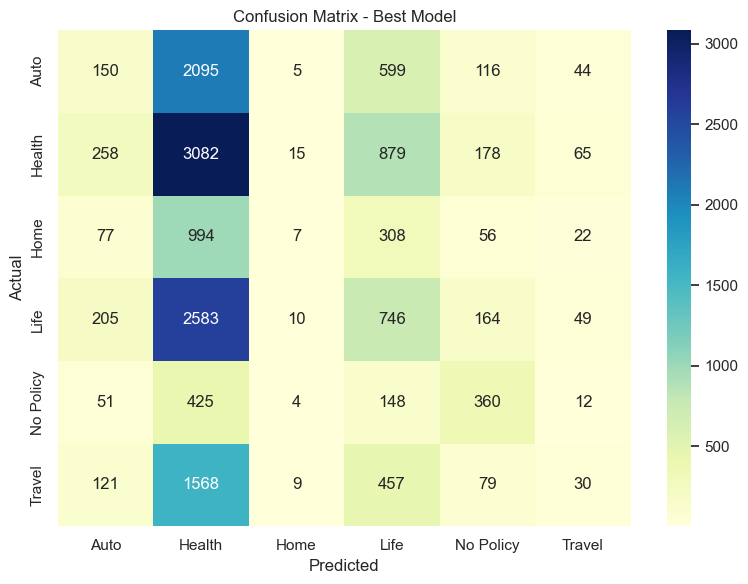

In [47]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target variable
le = LabelEncoder()
df['policy_type_encoded'] = le.fit_transform(df['policy_type'])

# Split features and target
X = df.drop(columns=['policy_type', 'policy_type_encoded'])
y = df['policy_type_encoded']

# One-hot encoding already done, now scale numeric features
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ----------------------
# Model 1: Random Forest
# ----------------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# ----------------------
# Model 2: Logistic Regression (One-vs-Rest)
# ----------------------
lr = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# ----------------------
# Model 3: XGBoost
# ----------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# ----------------------
# Evaluate all models
# ----------------------
models = {
    "Random Forest": rf_preds,
    "Logistic Regression": lr_preds,
    "XGBoost": xgb_preds
}

print("Classification Reports:\n")
for name, preds in models.items():
    print(f" {name}")
    print(classification_report(y_test, preds, target_names=le.classes_))
    print("-" * 60)

# Accuracy and Macro F1 Summary
summary = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [accuracy_score(y_test, preds) for preds in models.values()],
    "Macro F1 Score": [f1_score(y_test, preds, average='macro') for preds in models.values()]
})

print("Model Comparison Summary:")
display(summary)

# Optional: Confusion Matrix for Best Model
best_preds = xgb_preds  # or choose rf_preds if Random Forest does better
conf_mat = confusion_matrix(y_test, best_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
'''

Model Performance Summary (Multiclass Version)
Model	                     Accuracy	        Macro F1 Score	     Comments
Logistic Regression	           0.2911	          0.1336	        Highest accuracy but only Health class is being predicted well (poor generalization)
Random Forest	               0.2561	          0.1998	        Best macro F1, more balanced predictions across all classes
XGBoost                        0.2739	          0.1835	        Better recall on Health & No Policy; other classes are weak


Interpretation

Logistic Regression is overfitting to the Health class due to class distribution or linear limitations.
Random Forest is overall the best performer, balancing recall/precision better across multiple classes.
XGBoost is slightly better than Random Forest for "No Policy" and Health, but overall underperforms on rare classes like Travel and Auto.

Final Recommendation
We go with Random Forest as the final model for your multiclass classification problem, due to:
Best macro F1-score, which matters most in imbalanced multiclass settings.
Acceptable accuracy.
Better generalization than logistic regression or XGBoost in this case.

'''
